In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
edges_to_add = None

In [5]:
model = GAT(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/cora_gat_model.pth"
list_save_path = "../attacks/cora_gat_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.779
Initial Loss: 0.9002667665481567


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002668857574463, master_clean_delta: 0.000675499439239502, master_dirty_delta: 0.0006756782531738281
Attempt: 22, Selected: 10
max_change: 0.009002668857574463, master_clean_delta: 0.0006682872772216797, master_dirty_delta: 0.0006094574928283691
Attempt: 23, Selected: 10
max_change: 0.009002668857574463, master_clean_delta: 0.0006691813468933105, master_dirty_delta: 0.000706017017364502
Attempt: 24, Selected: 10
max_change: 0.009002668857574463, master_clean_delta: -1.1324882507324219e-06, master_dirty_delta: 0.00024366378784179688
Attempt: 25, Selected: 10
Attempt: 26, Selected: 10
max_change: 0.009002668857574463, master_clean_delta: 0.0006706118583679199, master_dirty_delta: 0.0007739663124084473
Attempt: 61, Selected: 20
max_change: 0.009002668857574463, master_clean_delta: 0.0018523931503295898, master_dirty_delta: 0.0038704276084899902
Attempt: 89, Selected: 30
max_change: 0.009002668857574463, master_clean_delta: 0.0028171539306640625, ma

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.000675499439239502, master_dirty_delta: 0.0006756782531738281
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0002289414405822754, master_dirty_delta: 0.00031441450119018555
Attempt: 47, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0021205544471740723, master_dirty_delta: 0.004058539867401123
Attempt: 70, Selected: 30
Attempt: 71, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.005597591400146484, master_dirty_delta: 0.008164703845977783
Attempt: 72, Selected: 30
Attempt: 73, Selected: 30
Attempt: 74, Selected: 30
Attempt: 75, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.006289243698120117, master_dirty_delta: 0.008965492248535156
Attempt: 92, Selected: 40
Attempt: 93, Selected: 40
max_change: 0.009002667665481568, master_clean_delta: 0.006827890872955322, master_dirty_delta: 0.00

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006755590438842773
Attempt: 15, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.005033433437347412, master_dirty_delta: 0.005094647407531738
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.007212996482849121, master_dirty_delta: 0.006622016429901123
Attempt: 51, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.007698416709899902, master_dirty_delta: 0.007974505424499512
Attempt: 65, Selected: 40
max_change: 0.009002667665481568, master_clean_delta: 0.005890250205993652, master_dirty_delta: 0.006917297840118408
Attempt: 79, Selected: 50
Attempt: 80, Selected: 50
max_change: 0.009002667665481568, master_clean_delta: 0.007697343826293945, master_dirty_delta: 0.01057577133178711
Attempt: 101, Selected: 60
Attempt: 102, Selected: 60
max_change: 0.009002667665481568, mas

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

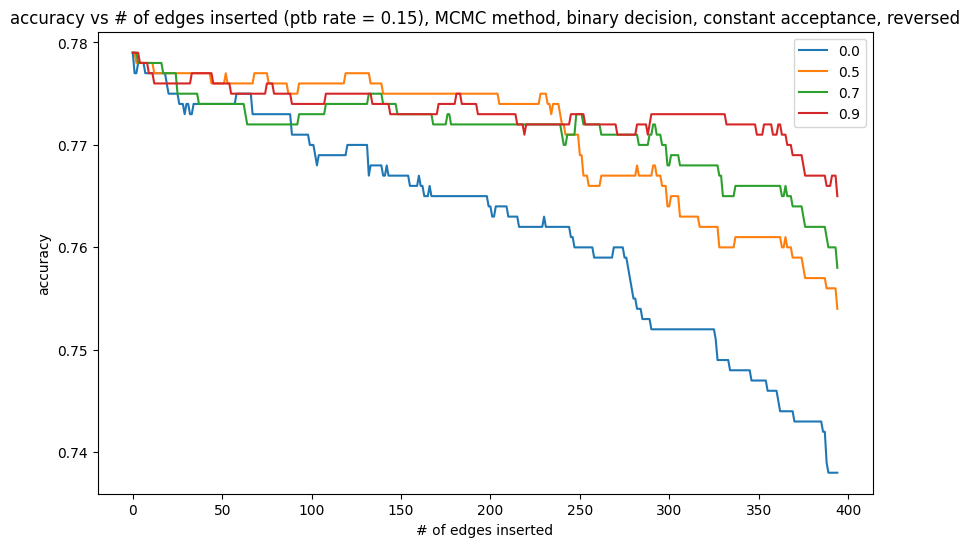

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

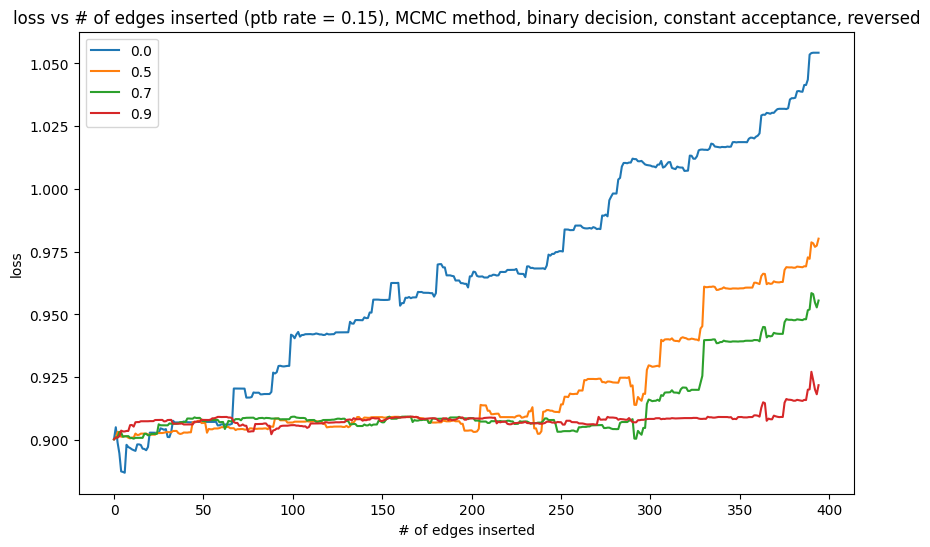

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: -0.0011621713638305664, master_dirty_delta: -0.0004330873489379883
Attempt: 5, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 4.76837158203125e-07, master_dirty_delta: 9.298324584960938e-06
Attempt: 73, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: -0.00015473365783691406, master_dirty_delta: 0.0011416077613830566
Attempt: 96, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0004476308822631836, master_dirty_delta: 0.006308853626251221
Attempt: 123, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: -7.933378219604492e-05, master_dirty_delta: 0.006154954433441162
Attempt: 147, Selected: 40
max_change: 0.009002667665481568, 

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006757378578186035
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: 2.1457672119140625e-06
Attempt: 42, Selected: 10
Attempt: 43, Selected: 10
Attempt: 44, Selected: 10
Attempt: 45, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.00016546249389648438, master_dirty_delta: 0.00028336048126220703
Attempt: 66, Selected: 20
Attempt: 67, Selected: 20
Attempt: 68, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00023627281188964844, master_dirty_delta: 0.008483171463012695
Attempt: 69, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.004394829273223877, master_dirty_delta: 0.01264190673828125
Attempt: 70, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00018852949142456055, master_dirty_delta: 

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756186485290527
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.2649765014648438e-06, master_dirty_delta: 1.9073486328125e-06
Attempt: 35, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589059829711914, master_dirty_delta: 0.00029581785202026367
Attempt: 36, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: -0.001113295555114746, master_dirty_delta: -0.0010502934455871582
Attempt: 37, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589059829711914, master_dirty_delta: 0.00029587745666503906
Attempt: 54, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: -0.0011278390884399414, master_dirty_delta: -0.0009678006172180176
Attempt: 55, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: -0.0035765767097473145, ma

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GAT, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

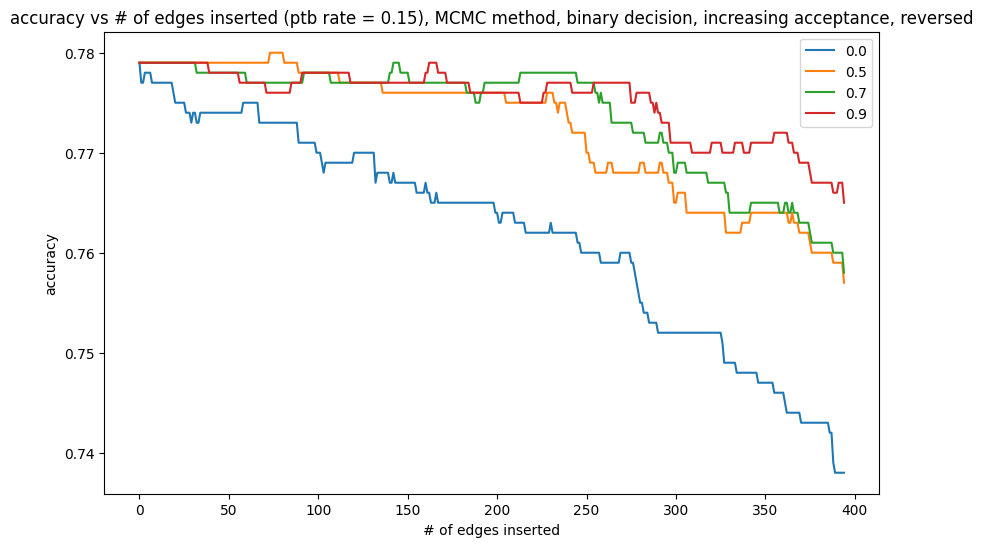

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

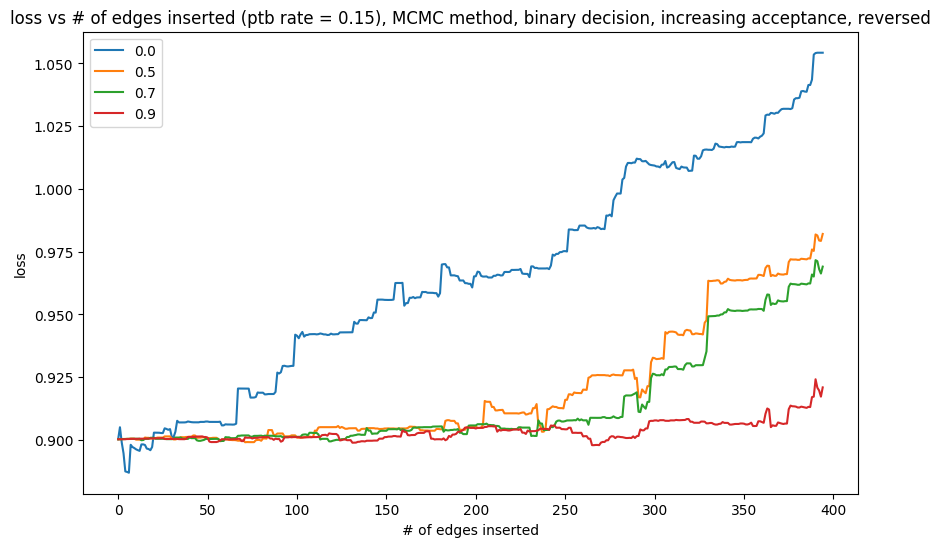

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756186485290527
Attempt: 29, Selected: 10
Attempt: 30, Selected: 10
Attempt: 31, Selected: 10
Attempt: 32, Selected: 10
Attempt: 33, Selected: 10
Attempt: 34, Selected: 10
Attempt: 35, Selected: 10
Attempt: 36, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0025664567947387695, master_dirty_delta: 0.0044037699699401855
Attempt: 72, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.003144979476928711, master_dirty_delta: 0.011722087860107422
Attempt: 73, Selected: 20
Attempt: 74, Selected: 20
Attempt: 75, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.003254115581512451, master_dirty_delta: 0.011827588081359863
Attempt: 76, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0032668113708496094, master_dirty_delta: 0.010945141315460205
Attempt: 77, Selected: 20
Attempt: 78, Selected:

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006757974624633789
Attempt: 24, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0009153485298156738, master_dirty_delta: 0.0008383393287658691
Attempt: 25, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0009163618087768555, master_dirty_delta: 0.0008968710899353027
Attempt: 26, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.000916600227355957, master_dirty_delta: 0.0010189414024353027
Attempt: 53, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0022818446159362793, master_dirty_delta: 0.004147231578826904
Attempt: 54, Selected: 20
Attempt: 55, Selected: 20
Attempt: 56, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0024935007095336914, master_dirty_delta: 0.004616141319274902
Attempt: 87, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.0

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006755590438842773
Attempt: 15, Selected: 10
max_change: 0.009002668261528015, master_clean_delta: 0.005033373832702637, master_dirty_delta: 0.005094647407531738
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: 0.007212936878204346, master_dirty_delta: 0.006621956825256348
Attempt: 51, Selected: 30
max_change: 0.009002668261528015, master_clean_delta: 0.007698357105255127, master_dirty_delta: 0.007974505424499512
Attempt: 76, Selected: 40
max_change: 0.009002668261528015, master_clean_delta: 0.00847935676574707, master_dirty_delta: 0.011903822422027588
Attempt: 77, Selected: 40
Attempt: 78, Selected: 40
max_change: 0.009002668261528015, master_clean_delta: 0.008589684963226318, master_dirty_delta: 0.012014269828796387
Attempt: 128, Selected: 50
max_change: 0.009002668261528015, master_clean_delta: 0.00891977

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

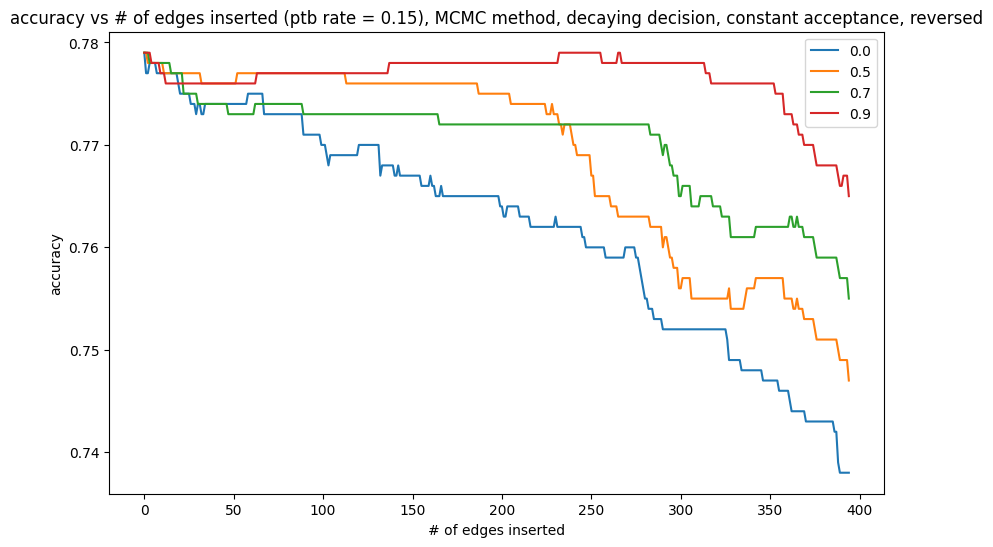

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

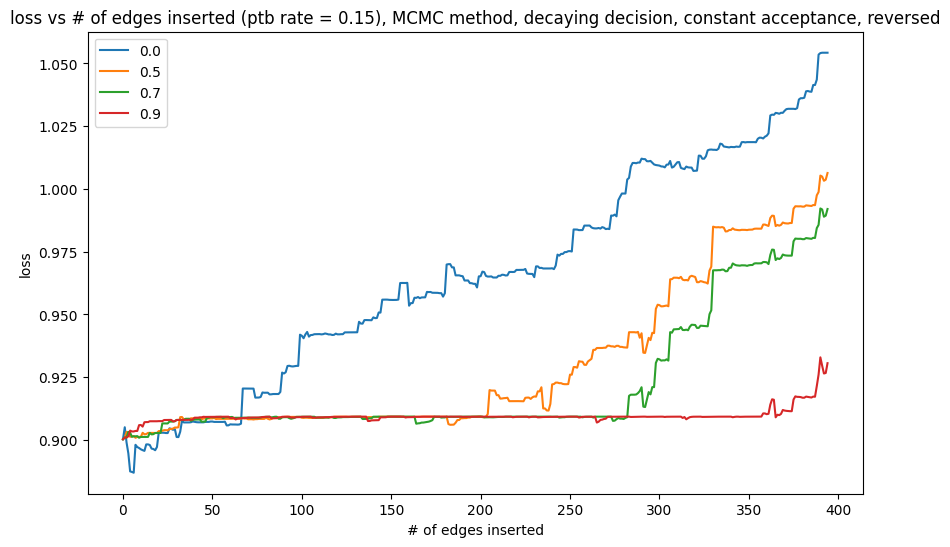

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: -0.0011622905731201172, master_dirty_delta: -0.0004330873489379883
Attempt: 5, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 4.172325134277344e-07, master_dirty_delta: 9.298324584960938e-06
Attempt: 74, Selected: 10
max_change: 0.009002668261528015, master_clean_delta: 0.0002358555793762207, master_dirty_delta: 0.0014595985412597656
Attempt: 75, Selected: 10
Attempt: 76, Selected: 10
max_change: 0.009002668261528015, master_clean_delta: 0.0002358555793762207, master_dirty_delta: 0.0017341971397399902
Attempt: 107, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: -0.00037348270416259766, master_dirty_delta: 0.005819559097290039
Attempt: 108, Selected: 20
max_cha

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 2.205371856689453e-06, master_dirty_delta: 2.205371856689453e-06
Attempt: 42, Selected: 10
Attempt: 43, Selected: 10
Attempt: 44, Selected: 10
Attempt: 45, Selected: 10
max_change: 0.009002668261528015, master_clean_delta: 0.00016540288925170898, master_dirty_delta: 0.0002834200859069824
Attempt: 66, Selected: 20
Attempt: 67, Selected: 20
Attempt: 68, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: 0.00023621320724487305, master_dirty_delta: 0.00848323106765747
Attempt: 69, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: 0.004394888877868652, master_dirty_delta: 0.012641966342926025
Attempt: 70, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: 0.00018846988677978516, master_dirty_delta: 0.0

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006755590438842773
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: 1.9669532775878906e-06
Attempt: 35, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589059829711914, master_dirty_delta: 0.00029587745666503906
Attempt: 57, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0008671283721923828, master_dirty_delta: 0.0020198822021484375
Attempt: 58, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0007364153861999512, master_dirty_delta: 0.0018891692161560059
Attempt: 59, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0003193020820617676, master_dirty_delta: 0.0014720559120178223
Attempt: 89, Selected: 30
Attempt: 90, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

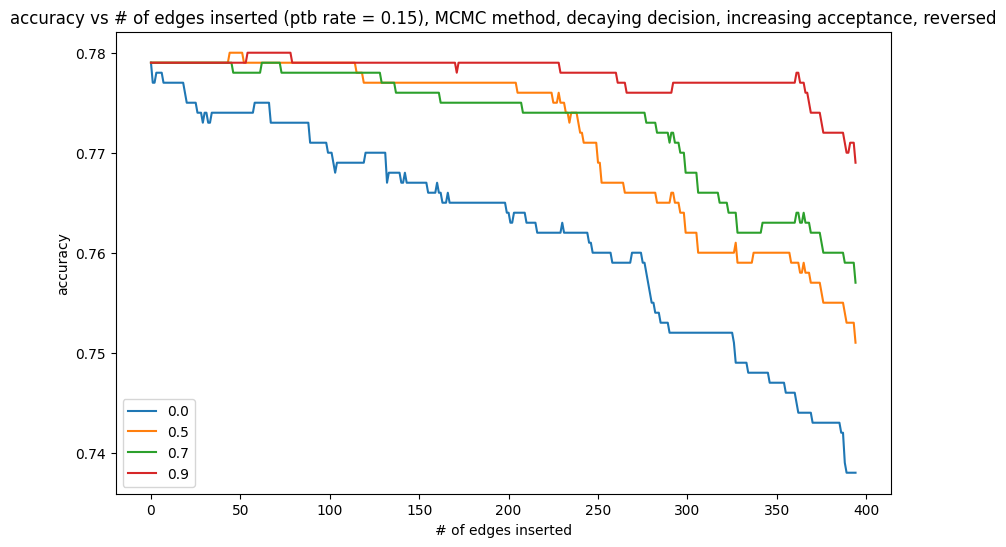

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

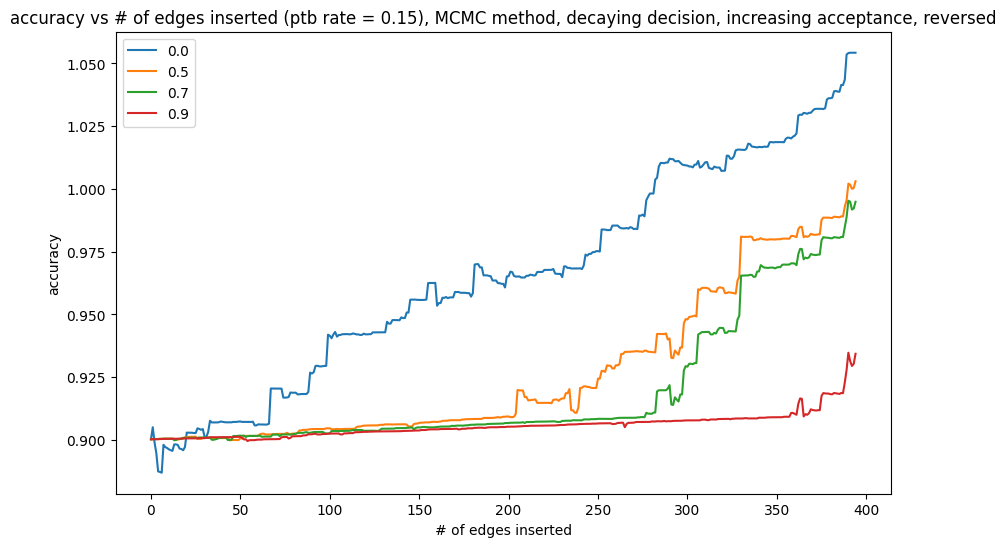

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 22, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0006684064865112305, master_dirty_delta: 0.0006095767021179199
Attempt: 23, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0006694197654724121, master_dirty_delta: 0.0007059574127197266
Attempt: 24, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: -1.0132789611816406e-06, master_dirty_delta: 0.00024378299713134766
Attempt: 25, Selected: 10
Attempt: 26, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0006707310676574707, master_dirty_delta: 0.0007739067077636719
Attempt: 49, Selected: 20
Attempt: 50, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0022872090339660645, master_dirty_delta: 0.00423276424407959
Attempt: 82, Selected: 30
max_change: 0.009002667665481568, master_clean_delta:

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 19, Selected: 10
Attempt: 20, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0002288818359375, master_dirty_delta: 0.00031441450119018555
Attempt: 47, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0021205544471740723, master_dirty_delta: 0.004058539867401123
Attempt: 70, Selected: 30
Attempt: 71, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.005597591400146484, master_dirty_delta: 0.008164703845977783
Attempt: 72, Selected: 30
Attempt: 73, Selected: 30
Attempt: 74, Selected: 30
Attempt: 75, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.006289124488830566, master_dirty_delta: 0.00896543264389038
Attempt: 92, Selected: 40
Attempt: 93, Selected: 40
max_change: 0.009002667665481568, master_clean_delta: 0.006827890872955322, master_dirty_delta: 0.00951

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006755590438842773
Attempt: 15, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.005033433437347412, master_dirty_delta: 0.005094647407531738
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.007212996482849121, master_dirty_delta: 0.006621956825256348
Attempt: 51, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.007698416709899902, master_dirty_delta: 0.007974505424499512
Attempt: 65, Selected: 40
max_change: 0.009002667665481568, master_clean_delta: 0.005890309810638428, master_dirty_delta: 0.006917357444763184
Attempt: 85, Selected: 50
Attempt: 86, Selected: 50
max_change: 0.009002667665481568, master_clean_delta: 0.006743013858795166, master_dirty_delta: 0.009790003299713135
Attempt: 104, Selected: 60
max_change: 0.009002667665481568, master_clean_delta: 0.0076854

Peturbing graph...:   0%|          | 0/41 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

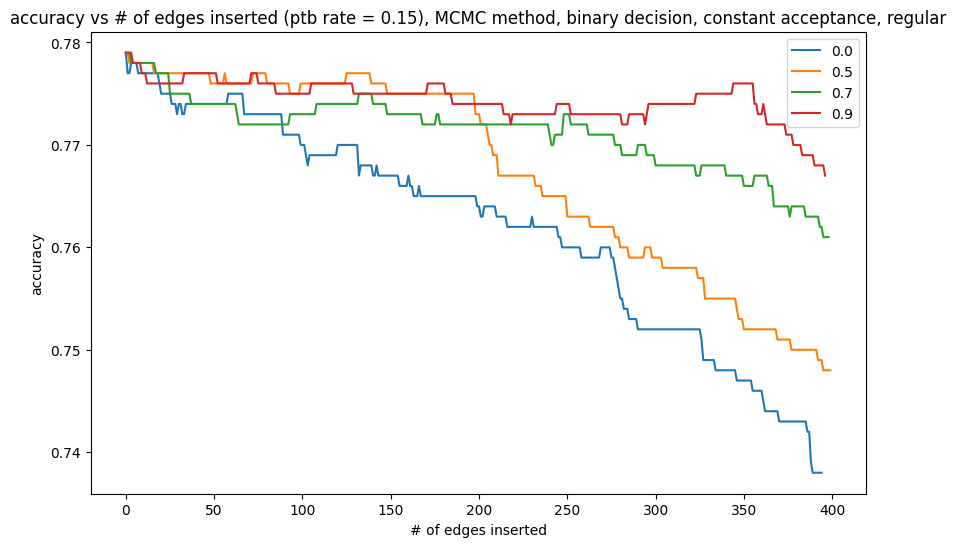

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

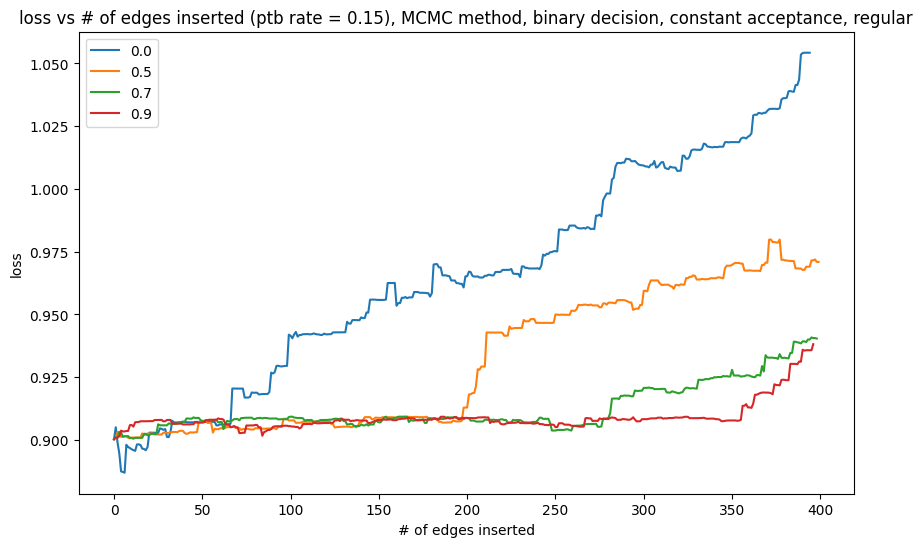

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: -0.0011621713638305664, master_dirty_delta: -0.0004330873489379883
Attempt: 5, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 4.76837158203125e-07, master_dirty_delta: 9.298324584960938e-06
Attempt: 73, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: -0.00015485286712646484, master_dirty_delta: 0.0011416077613830566
Attempt: 96, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0004476308822631836, master_dirty_delta: 0.006308853626251221
Attempt: 124, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: -7.933378219604492e-05, master_dirty_delta: 0.006154954433441162
Attempt: 148, Selected: 40
max_change: 0.009002667665481568, 

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.2649765014648438e-06, master_dirty_delta: 2.086162567138672e-06
Attempt: 42, Selected: 10
Attempt: 43, Selected: 10
Attempt: 44, Selected: 10
Attempt: 45, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.00016546249389648438, master_dirty_delta: 0.00028330087661743164
Attempt: 66, Selected: 20
Attempt: 67, Selected: 20
Attempt: 68, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00023615360260009766, master_dirty_delta: 0.00848311185836792
Attempt: 69, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.004394829273223877, master_dirty_delta: 0.012641847133636475
Attempt: 70, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00018852949142456055, master_dirty_delta: 0

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006755590438842773
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: 1.9669532775878906e-06
Attempt: 35, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589059829711914, master_dirty_delta: 0.00029587745666503906
Attempt: 36, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: -0.001113295555114746, master_dirty_delta: -0.0010502934455871582
Attempt: 37, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589059829711914, master_dirty_delta: 0.00029581785202026367
Attempt: 38, Selected: 10
Attempt: 39, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0001589655876159668, master_dirty_delta: 0.00029581785202026367
Attempt: 59, Selected: 20
max_change: 0.009002667665481568, master_clean_delta

Peturbing graph...:   0%|          | 0/40 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GAT, Dataset.CORA, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

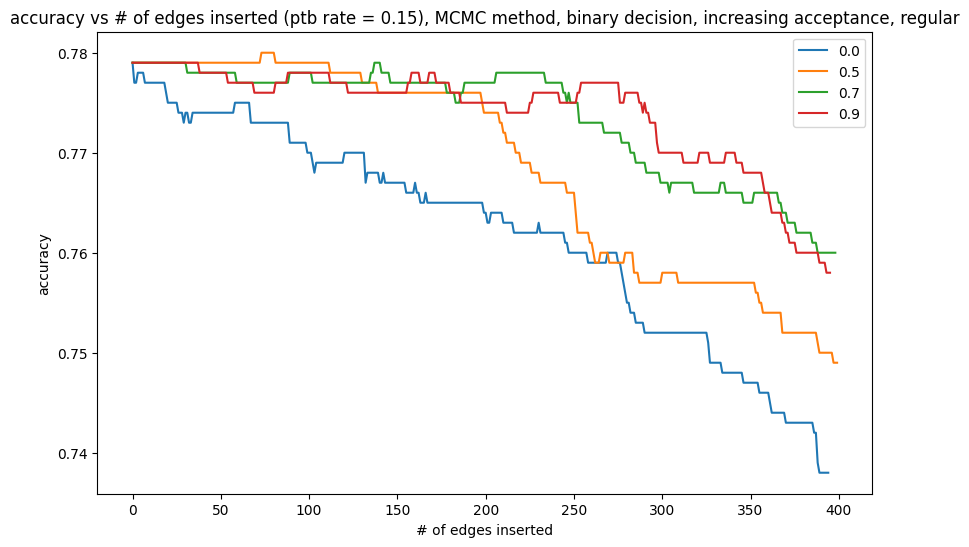

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

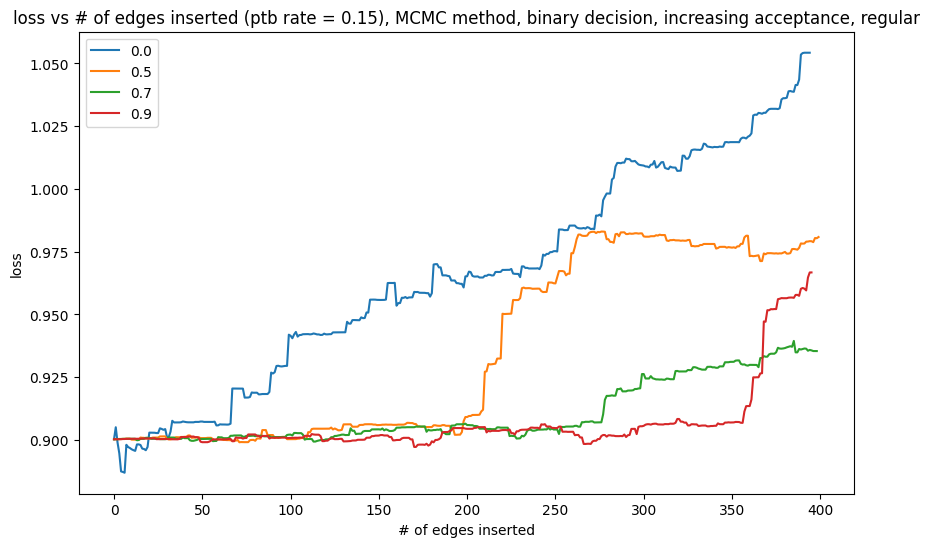

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756186485290527
Attempt: 29, Selected: 10
Attempt: 30, Selected: 10
Attempt: 31, Selected: 10
Attempt: 32, Selected: 10
Attempt: 33, Selected: 10
Attempt: 34, Selected: 10
Attempt: 35, Selected: 10
Attempt: 36, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0025664567947387695, master_dirty_delta: 0.004403829574584961
Attempt: 72, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00314486026763916, master_dirty_delta: 0.011722147464752197
Attempt: 73, Selected: 20
Attempt: 74, Selected: 20
Attempt: 75, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0032539963722229004, master_dirty_delta: 0.011827588081359863
Attempt: 76, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00326693058013916, master_dirty_delta: 0.01094508171081543
Attempt: 77, Selected: 20
Attempt: 78, Selected: 20


Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756782531738281
Attempt: 24, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0009153485298156738, master_dirty_delta: 0.0008382201194763184
Attempt: 25, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0009163618087768555, master_dirty_delta: 0.000896751880645752
Attempt: 26, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0009166598320007324, master_dirty_delta: 0.001018822193145752
Attempt: 53, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0022818446159362793, master_dirty_delta: 0.004147052764892578
Attempt: 54, Selected: 20
Attempt: 55, Selected: 20
Attempt: 56, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.0024935007095336914, master_dirty_delta: 0.0046160221099853516
Attempt: 87, Selected: 30
max_change: 0.009002667665481568, master_clean_delta: 0.0

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002668261528015, master_clean_delta: 0.0006754398345947266, master_dirty_delta: 0.0006756186485290527
Attempt: 15, Selected: 10
max_change: 0.009002668261528015, master_clean_delta: 0.005033373832702637, master_dirty_delta: 0.005094587802886963
Attempt: 36, Selected: 20
Attempt: 37, Selected: 20
max_change: 0.009002668261528015, master_clean_delta: 0.007212936878204346, master_dirty_delta: 0.0066220760345458984
Attempt: 51, Selected: 30
max_change: 0.009002668261528015, master_clean_delta: 0.007698357105255127, master_dirty_delta: 0.007974565029144287
Attempt: 72, Selected: 40
max_change: 0.009002668261528015, master_clean_delta: 0.008937716484069824, master_dirty_delta: 0.012362301349639893
Attempt: 129, Selected: 50
max_change: 0.009002668261528015, master_clean_delta: 0.008920371532440186, master_dirty_delta: 0.012575328350067139
Attempt: 155, Selected: 60
Attempt: 156, Selected: 60
max_change: 0.009002668261528015, master_clean_delta: 0.0044

Peturbing graph...:   0%|          | 0/40 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

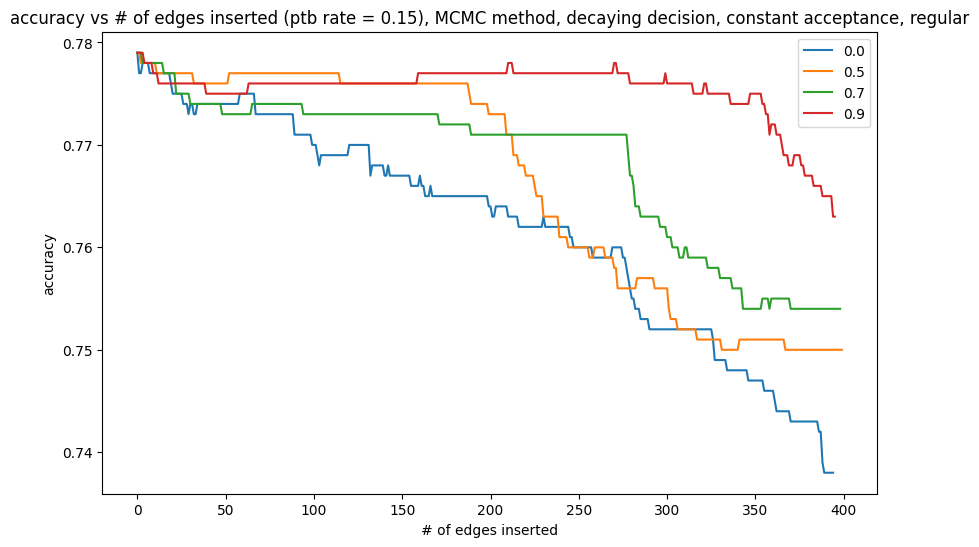

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

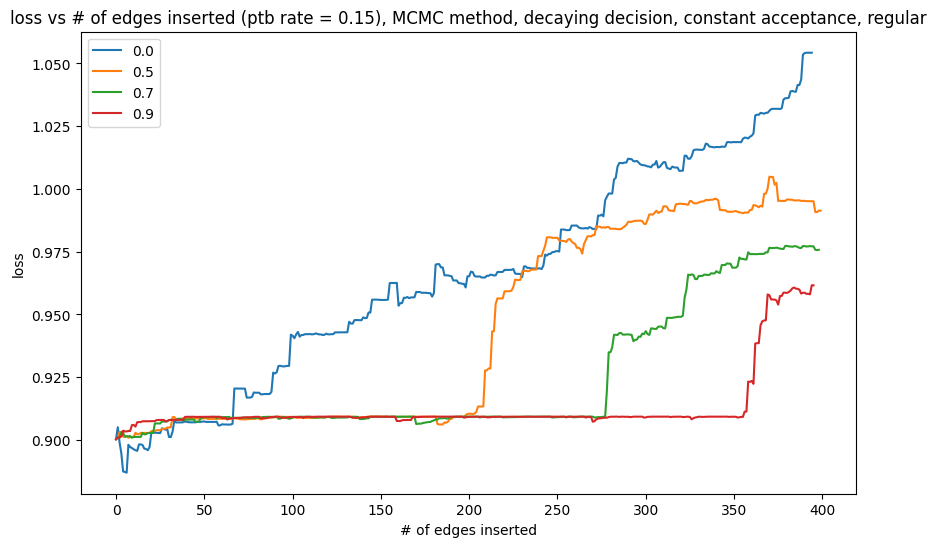

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [47]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
Attempt: 3, Selected: 0
Attempt: 4, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: -0.0011621713638305664, master_dirty_delta: -0.0004330873489379883
Attempt: 5, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 5.960464477539062e-07, master_dirty_delta: 9.298324584960938e-06
Attempt: 74, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0002359151840209961, master_dirty_delta: 0.0014595985412597656
Attempt: 75, Selected: 10
Attempt: 76, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.0002359151840209961, master_dirty_delta: 0.0017341971397399902
Attempt: 107, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: -0.00037342309951782227, master_dirty_delta: 0.005819559097290039
Attempt: 108, Selected: 20
max_cha

Peturbing graph...:   0%|          | 0/202 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.0006756782531738281
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.009002667665481568, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: 2.086162567138672e-06
Attempt: 42, Selected: 10
Attempt: 43, Selected: 10
Attempt: 44, Selected: 10
Attempt: 45, Selected: 10
max_change: 0.009002667665481568, master_clean_delta: 0.00016546249389648438, master_dirty_delta: 0.00028330087661743164
Attempt: 66, Selected: 20
Attempt: 67, Selected: 20
Attempt: 68, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00023615360260009766, master_dirty_delta: 0.008483171463012695
Attempt: 69, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.004394829273223877, master_dirty_delta: 0.012641847133636475
Attempt: 70, Selected: 20
max_change: 0.009002667665481568, master_clean_delta: 0.00018852949142456055, master_dirty_delta: 

Peturbing graph...:   0%|          | 0/122 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.00900266706943512, master_clean_delta: 0.0006756186485290527, master_dirty_delta: 0.000675499439239502
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.00900266706943512, master_clean_delta: 2.3245811462402344e-06, master_dirty_delta: 1.8477439880371094e-06
Attempt: 35, Selected: 10
max_change: 0.00900266706943512, master_clean_delta: 0.0001589655876159668, master_dirty_delta: 0.0002957582473754883
Attempt: 36, Selected: 10
max_change: 0.00900266706943512, master_clean_delta: -0.0011134743690490723, master_dirty_delta: -0.0010503530502319336
Attempt: 37, Selected: 10
max_change: 0.00900266706943512, master_clean_delta: 0.0001589655876159668, master_dirty_delta: 0.00029581785202026367
Attempt: 57, Selected: 20
max_change: 0.00900266706943512, master_clean_delta: 0.0009152889251708984, master_dirty_delta: 0.0020679831504821777
Attempt: 58, Selected: 20
max_change: 0.00900266706943512, master_clean_delta: 0.0007846951484680176, master_dir

Peturbing graph...:   0%|          | 0/40 [00:00<?, ?it/s]

In [48]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GAT, Dataset.CORA, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"cora"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

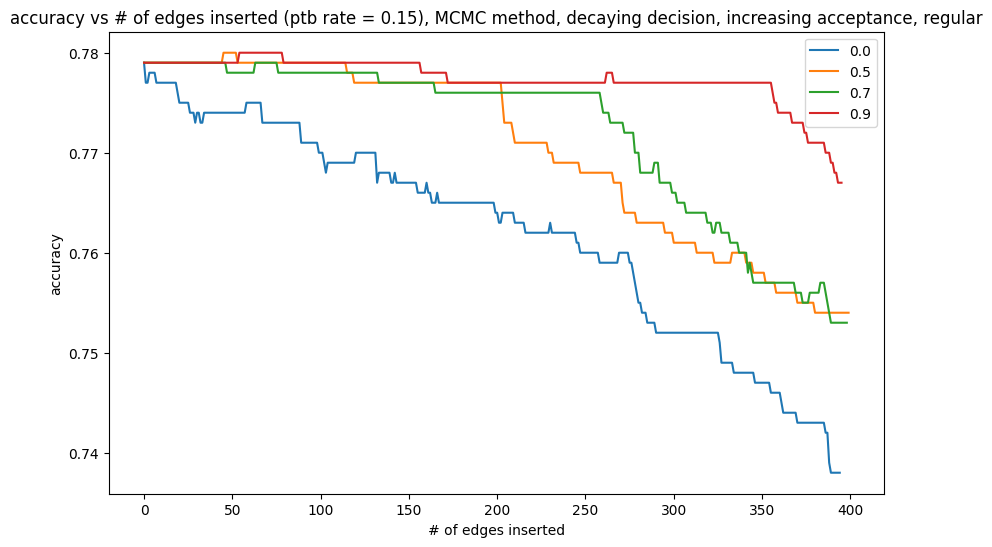

In [49]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

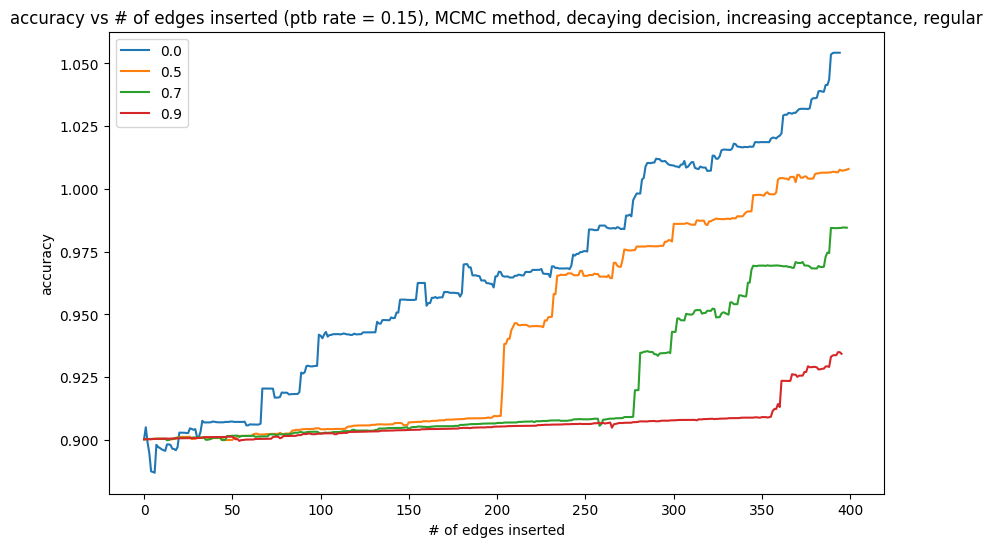

In [50]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")